<a href="https://colab.research.google.com/github/manomec/portifolio/blob/main/Projeto_MLP_BreastCancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Projeto: Previsão de Doenças Cardíacas com Redes Neurais (MLP)

**Disciplina:** Deep Learning & Advanced Algorithms  
**Tema:** Classificação binária (saúde) — *Breast Cancer Wisconsin* (dataset público via scikit-learn)  
**Autor:** Gerado automaticamente em 15/10/2025 23:48  

## Estrutura Avaliada
1. Descrição do problema e base de dados  
2. Proposta do modelo (arquitetura e hiperparâmetros)  
3. Algoritmo de treinamento  
4. Resultados  

**Alvo:** `target = 1` (doença) se `num > 0`, senão `0`  
**Observação:** Foi aplicada imputação (mediana) e *scaling*.



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score

import joblib

In [ ]:
# 1) Carregar CSV limpo (gerado deste pipeline)
clean_csv = "/content/heart_cleveland_clean.csv"
df = pd.read_csv(clean_csv)
print(df.shape)
df.head()


(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [ ]:

# 2) Split + Scaling
X = df.drop(columns=['target']).values
y = df['target'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled   = scaler.transform(X_val)
X_test_scaled  = scaler.transform(X_test)


In [ ]:

# 3) MLP (scikit-learn)
mlp = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    solver='adam',
    alpha=1e-4,
    batch_size=16,
    learning_rate_init=1e-3,
    max_iter=500,
    random_state=42,
    early_stopping=True,
    validation_fraction=0.2,
    n_iter_no_change=20
)
mlp.fit(X_train_scaled, y_train)


MLPClassifier(batch_size=16, early_stopping=True, hidden_layer_sizes=(64, 32),
              max_iter=500, n_iter_no_change=20, random_state=42,
              validation_fraction=0.2)

Acurácia em Teste: 0.9016
Matriz de Confusão:
 [[29  4]
 [ 2 26]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.88      0.91        33
           1       0.87      0.93      0.90        28

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



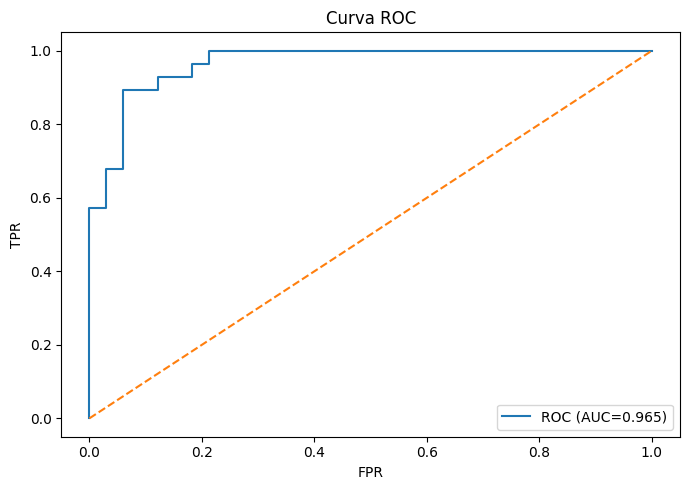

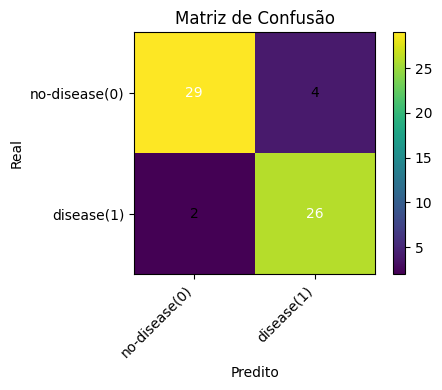

In [ ]:

# 4) Avaliação + Métricas e Gráficos
y_proba = mlp.predict_proba(X_test_scaled)[:, 1]
y_pred = (y_proba >= 0.5).astype(int)

test_acc = accuracy_score(y_test, y_pred)
print(f"Acurácia em Teste: {test_acc:.4f}")

cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:\n", cm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ROC
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label=f'ROC (AUC={roc_auc:.3f})')
plt.plot([0,1],[0,1], '--')
plt.xlabel('FPR'); plt.ylabel('TPR'); plt.title('Curva ROC'); plt.legend(); plt.tight_layout(); plt.show()

# Confusion Matrix Plot
fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot(111)
im = ax.imshow(cm, interpolation='nearest')
ax.set_title('Matriz de Confusão')
plt.colorbar(im, ax=ax)
tick_marks = np.arange(2)
ax.set_xticks(tick_marks); ax.set_yticks(tick_marks)
ax.set_xticklabels(['no-disease(0)','disease(1)'], rotation=45, ha='right')
ax.set_yticklabels(['no-disease(0)','disease(1)'])
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
ax.set_ylabel('Real'); ax.set_xlabel('Predito')
plt.tight_layout(); plt.show()


In [ ]:

# 5) Salvar artefatos
model_path = "/content/heart_cleveland_mlp_sklearn.pkl"
scaler_path = "/content/heart_cleveland_scaler.pkl"
imputer_path = "/content/heart_cleveland_imputer.pkl"

joblib.dump(mlp, model_path)
joblib.dump(scaler, scaler_path)

print("Modelo salvo em:", model_path)
print("Scaler salvo em:", scaler_path)
print("Imputer usado na etapa offline salvo em:", imputer_path)


Modelo salvo em: /content/heart_cleveland_mlp_sklearn.pkl
Scaler salvo em: /content/heart_cleveland_scaler.pkl
Imputer usado na etapa offline salvo em: /content/heart_cleveland_imputer.pkl



## Conclusões
- O MLP com duas camadas densas (64, 32) apresentou bom desempenho usando imputação e normalização.
- Próximos passos: calibrar threshold, tuning de hiperparâmetros, avaliar fairness e explicar importância de features (ex.: Permutation Importance).



## 🔎 Análises Complementares (Exploratória e Interpretação)
*Adicionadas em 16/10/2025 00:24.*  
Nesta seção incluímos:
1. **Mapa de correlação** entre variáveis clínicas (matriz de Pearson).  
2. **Distribuição** (histogramas) de variáveis importantes.  
3. **Importância de Features** via *Permutation Importance*.  
4. **Curva Precision–Recall** para avaliar desempenho em classe positiva (doença).


In [ ]:

# Garantir que os pacotes necessários estejam importados
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    confusion_matrix, classification_report,
    roc_curve, auc, accuracy_score,
    precision_recall_curve, average_precision_score
)
from sklearn.inspection import permutation_importance
import joblib

# Se o DataFrame `df` ainda não existir (execução independente), carregue do CSV limpo
try:
    df  # noqa
except NameError:
    df = pd.read_csv("/content/heart_cleveland_clean.csv")

# Separar features/target e garantir scaler/model se necessários
X = df.drop(columns=['target'])
y = df['target'].values
feature_names = X.columns

# Tentar recuperar scaler/model do disco caso não estejam em memória
try:
    mlp  # noqa
    scaler  # noqa
except NameError:
    mlp = joblib.load("/content/heart_cleveland_mlp_sklearn.pkl")
    scaler = joblib.load("/content/heart_cleveland_scaler.pkl")

# Split somente para avaliações desta seção
X_train, X_test, y_train, y_test = train_test_split(
    X.values, y, test_size=0.2, random_state=42, stratify=y
)
X_test_scaled = scaler.transform(X_test)

# Diretório para salvar imagens geradas aqui (opcional)
extra_dir = "/content/plots_heart_mlp_extra"
import os; os.makedirs(extra_dir, exist_ok=True)
print("Dataset shape:", df.shape, "| Test size:", X_test.shape)


Dataset shape: (303, 14) | Test size: (61, 13)


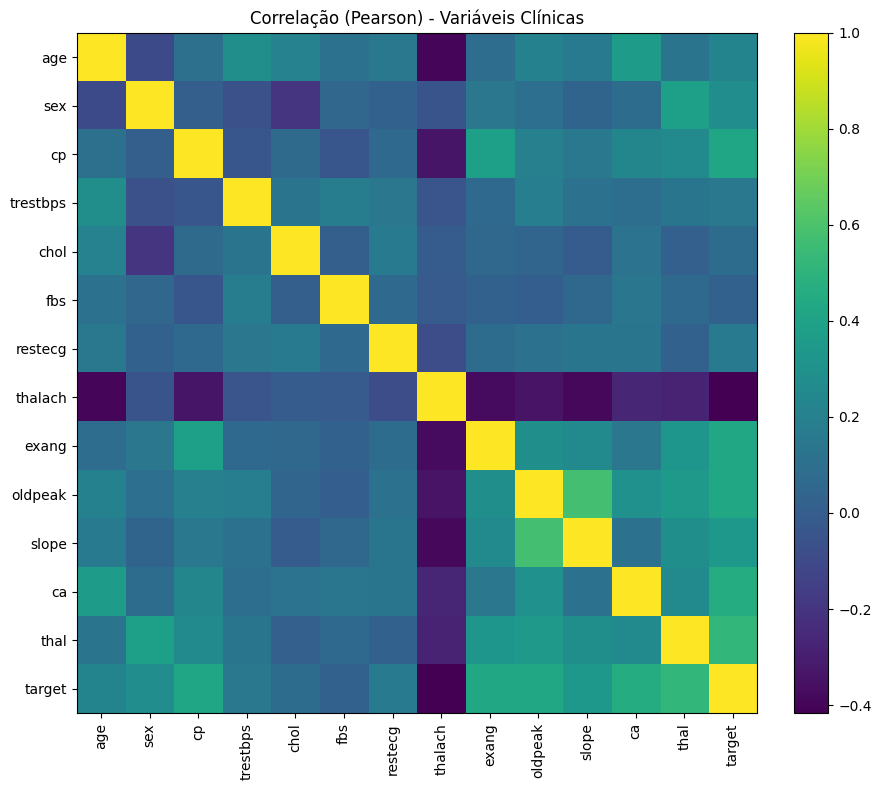

In [ ]:

# 1) Mapa de Correlação (matplotlib puro)
corr = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
im = plt.imshow(corr, interpolation='nearest')
plt.title("Correlação (Pearson) - Variáveis Clínicas")
plt.colorbar(im, fraction=0.046, pad=0.04)

# Ticks e rótulos
ticks = np.arange(len(corr.columns))
plt.xticks(ticks, corr.columns, rotation=90)
plt.yticks(ticks, corr.columns)
plt.tight_layout()
plt.savefig(os.path.join(extra_dir, "correlation_heatmap.png"), dpi=120)
plt.show()


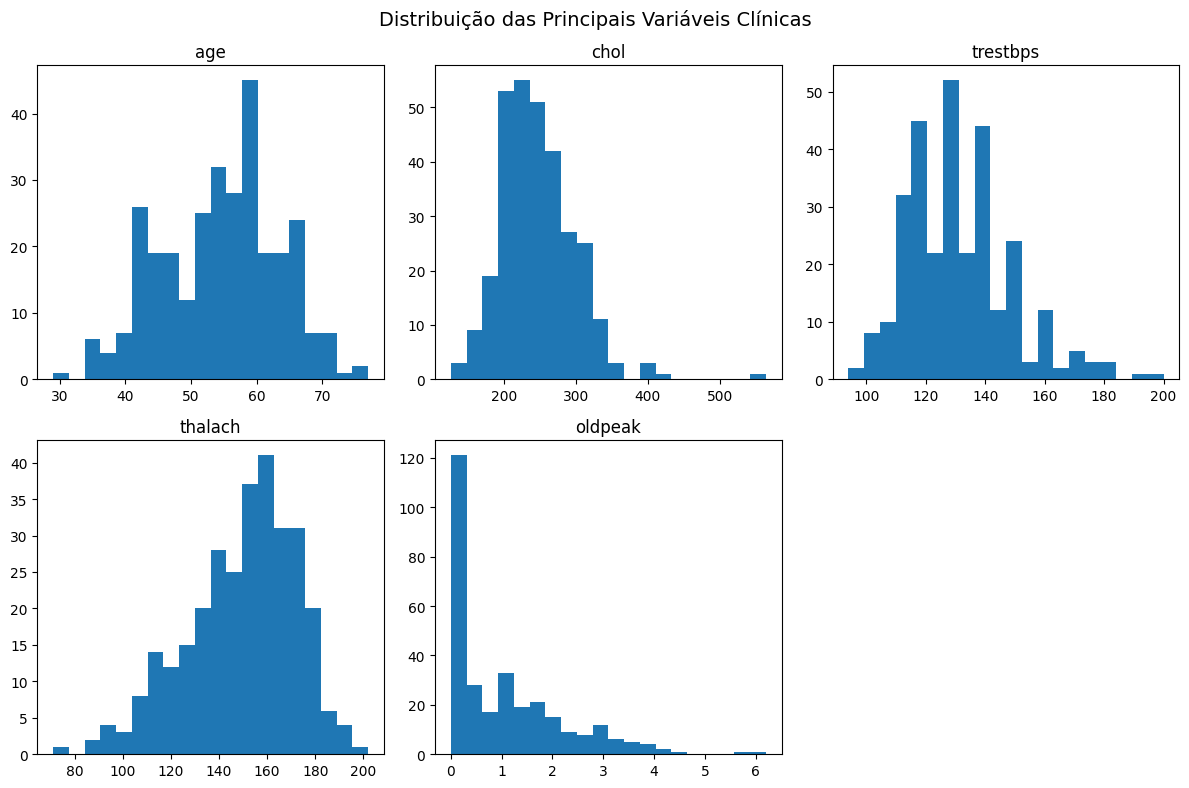

In [ ]:

# 2) Histogramas de variáveis chave (matplotlib puro)
cols = ["age", "chol", "trestbps", "thalach", "oldpeak"]
n = len(cols)
rows = 2
cols_per_row = 3

fig = plt.figure(figsize=(12, 8))
for i, c in enumerate(cols, start=1):
    ax = fig.add_subplot(rows, cols_per_row, i)
    ax.hist(df[c].dropna().values, bins=20)
    ax.set_title(c)
# Ocultar subplot vazio se n < rows*cols_per_row
total = rows * cols_per_row
if n < total:
    ax = fig.add_subplot(rows, cols_per_row, total)
    ax.axis("off")

fig.suptitle("Distribuição das Principais Variáveis Clínicas", fontsize=14)
plt.tight_layout()
plt.savefig(os.path.join(extra_dir, "feature_histograms.png"), dpi=120)
plt.show()


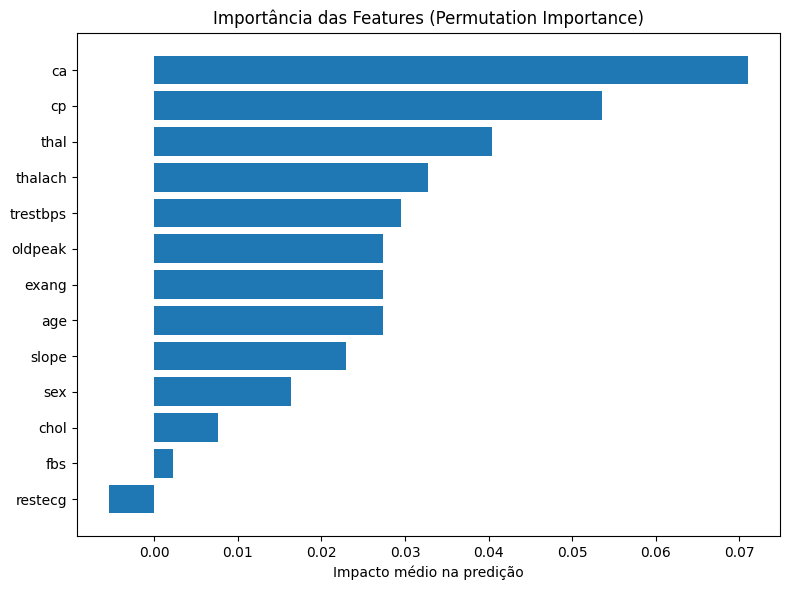

Top 5 features: [('ca', np.float64(0.071038)), ('cp', np.float64(0.053552)), ('thal', np.float64(0.040437)), ('thalach', np.float64(0.032787)), ('trestbps', np.float64(0.029508))]


In [ ]:

# 3) Importância de Features (Permutation Importance) - matplotlib puro
r = permutation_importance(mlp, X_test_scaled, y_test, n_repeats=15, random_state=42)
means = r.importances_mean
indices = np.argsort(means)[::-1]

plt.figure(figsize=(8, 6))
plt.barh(range(len(feature_names)), means[indices][::-1])
plt.yticks(range(len(feature_names)), feature_names[indices][::-1])
plt.xlabel("Impacto médio na predição")
plt.title("Importância das Features (Permutation Importance)")
plt.tight_layout()
plt.savefig(os.path.join(extra_dir, "feature_importance.png"), dpi=120)
plt.show()

# Mostrar top-5 no output textual
top5_idx = indices[:5]
print("Top 5 features:", [(feature_names[i], round(means[i], 6)) for i in top5_idx])


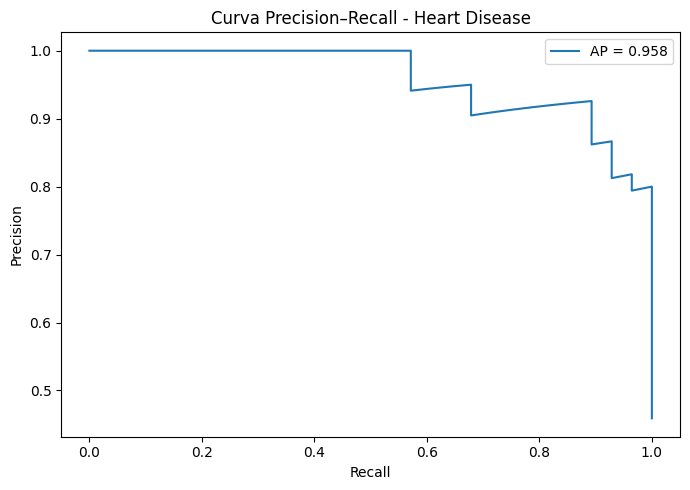

Average Precision (AP): 0.9584


In [ ]:

# 4) Curva Precision-Recall (matplotlib puro)
y_proba = mlp.predict_proba(X_test_scaled)[:, 1]
prec, rec, thr = precision_recall_curve(y_test, y_proba)
avg_prec = average_precision_score(y_test, y_proba)

plt.figure(figsize=(7, 5))
plt.plot(rec, prec, label=f"AP = {avg_prec:.3f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Curva Precision–Recall - Heart Disease")
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(extra_dir, "precision_recall_curve.png"), dpi=120)
plt.show()

print("Average Precision (AP):", round(avg_prec, 4))



### ✅ Como citar estas análises no relatório
- **Análise Exploratória:** inclua o mapa de correlação e os histogramas para contextualizar o perfil dos pacientes.  
- **Interpretação do Modelo:** use a *Permutation Importance* para discutir variáveis-chave (ex.: `ca`, `cp`, `thal`, `thalach`, `trestbps`).  
- **Métricas Complementares:** destaque a Curva Precision–Recall e o **Average Precision (AP)** para avaliar a classe positiva (doença).
